In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
# Specify the path to your text file
file_path = '/content/drive/MyDrive/prop_amino_details'

# Open the file and read it line by line
with open(file_path, 'r') as file:
    file_content = file.read()

# Now, file_content contains the entire content of the file as a string
print(file_content)

H ANDN920101
D alpha-CH chemical shifts (Andersen et al., 1992)
R PMID:1575719
A Andersen, N.H., Cao, B. and Chen, C.
T Peptide/protein structure analysis using the chemical shift index method: 
  upfield alpha-CH values reveal dynamic helices and aL sites
J Biochem. and Biophys. Res. Comm. 184, 1008-1014 (1992)
C BUNA790102    0.949
I    A/L     R/K     N/M     D/F     C/P     Q/S     E/T     G/W     H/Y     I/V
    4.35    4.38    4.75    4.76    4.65    4.37    4.29    3.97    4.63    3.95
    4.17    4.36    4.52    4.66    4.44    4.50    4.35    4.70    4.60    3.95
//
H ARGP820101
D Hydrophobicity index (Argos et al., 1982)
R PMID:7151796
A Argos, P., Rao, J.K.M. and Hargrave, P.A.
T Structural prediction of membrane-bound proteins
J Eur. J. Biochem. 128, 565-575 (1982)
C JOND750101    1.000  SIMZ760101    0.967  GOLD730101    0.936
  TAKK010101    0.906  MEEJ810101    0.891  ROSM880104    0.872
  CIDH920105    0.867  LEVM760106    0.865  CIDH920102    0.862
  MEEJ800102    0.85

In [ ]:
NA_numbers=0
def extract_properties(data):
    global NA_numbers
    properties = {}
    lines = data.split('\n')

    property_code = None
    amino_acids = None
    amino_values = None
    previous_line="Z"
    previous_line2p="Z"
    for line in lines:
        if line.startswith('H '):  # Line starting with 'H ' indicates a new property
            if property_code is not None and amino_acids is not None:
                properties[property_code] = dict(zip(amino_acids, amino_values))

            property_code = line.split()[1]  # Extract the property code
            property_values = []
            amino_acids = []
            amino_values = []
        elif line.startswith('I '):  # Line starting with 'I ' contains amino acid values
            amino_name = [str1.strip().split("/")[0] for str1 in line.split()[1:]]+ [str1.strip().split("/")[1] for str1 in line.split()[1:]]
            print(amino_name)
            amino_acids.extend(amino_name)  # Extract amino acids


        elif previous_line.startswith('I ') or previous_line2p.startswith('I '):  #
            value_list= line.strip().split()
            temp =[]
            for k in value_list:
              try:
                temp.append(float(k))
              except:
                temp.append(0.0)
                NA_numbers+=1
            amino_values.extend(temp)
            # for k in




        # elif line.strip() and amino_acids is not None:  # Non-empty line and we are processing amino acid values
        #     values = [float(value) if value.replace('.', '').replace('-', '').isdigit() else None for value in line.split()]  # Extract property values
        #     property_values.extend(values)

        previous_line2p=previous_line
        previous_line=line
    if property_code is not None and amino_acids is not None:
        properties[property_code] = dict(zip(amino_acids, amino_values))

    return properties

# Example data
example_data = """
H ANDN920101
D alpha-CH chemical shifts (Andersen et al., 1992)
R PMID:1575719
A Andersen, N.H., Cao, B. and Chen, C.
T Peptide/protein structure analysis using the chemical shift index method:
  upfield alpha-CH values reveal dynamic helices and aL sites
J Biochem. and Biophys. Res. Comm. 184, 1008-1014 (1992)
C BUNA790102    0.949
I    A/L     R/K     N/M     D/F     C/P     Q/S     E/T     G/W     H/Y     I/V
    4.35    4.38    4.75    4.76    4.65    4.37    4.29    3.97    4.63    3.95
    4.17    4.36    4.52    4.66    4.44    4.50    4.35    4.70    4.60    3.95
//
H ARGP820101
D Hydrophobicity index (Argos et al., 1982)
R PMID:7151796
A Argos, P., Rao, J.K.M. and Hargrave, P.A.
T Structural prediction of membrane-bound proteins
J Eur. J. Biochem. 128, 565-575 (1982)
C JOND750101    1.000  SIMZ760101    0.967  GOLD730101    0.936
  TAKK010101    0.906  MEEJ810101    0.891  ROSM880104    0.872
  CIDH920105    0.867  LEVM760106    0.865  CIDH920102    0.862
  MEEJ800102    0.855  MEEJ810102    0.853  ZHOH040101    0.841
  CIDH920103    0.827  PLIV810101    0.820  CIDH920104    0.819
  LEVM760107    0.806  NOZY710101    0.800  GUYH850103   -0.808
  PARJ860101   -0.835  WOLS870101   -0.838  BULH740101   -0.854
I    A/L     R/K     N/M     D/F     C/P     Q/S     E/T     G/W     H/Y     I/V
    0.61    0.60    0.06    0.46    1.07      0.    0.47    0.07    0.61    2.22
    1.53    1.15    1.18    2.02    1.95    0.05    0.05    2.65    1.88    1.32
//
H ARGP820102
D Signal sequence helical potential (Argos et al., 1982)
R PMID:7151796
A Argos, P., Rao, J.K.M. and Hargrave, P.A.
T Structural prediction of membrane-bound proteins
J Eur. J. Biochem. 128, 565-575 (1982)
C ARGP820103    0.961  KYTJ820101    0.803  JURD980101    0.802
I    A/L     R/K     N/M     D/F     C/P     Q/S     E/T     G/W     H/Y     I/V
    1.18    0.20    0.23    0.05    1.89    0.72    0.11    0.49    0.31    1.45
    3.23    0.06    2.67    1.96    0.76    0.97    0.84    0.77    0.39    1.08
//
"""

# Extract physicochemical properties from the example data
physicochemical_properties = extract_properties(file_content)

# Display the results
for property_code, values in physicochemical_properties.items():
    print(f"\n{property_code}:")
    for amino_acid, value in values.items():
        print(f"{amino_acid}: {value}")


In [ ]:
NA_numbers

15

In [ ]:
for i in physicochemical_properties.keys():
  if len(physicochemical_properties[i])!= 20:
    print("not equal 20")
    print(i)

In [ ]:
# Specify the path to your text file
file_path = '/content/drive/MyDrive/list_amino_prop.txt'
list_prop=[]
# Open the file and read it line by line
with open(file_path, 'r') as file:
    for line in file:
        # Process each line as needed
        print(line.strip())  # Print the stripped version of each line (without leading/trailing whitespaces)
        list_prop.append(line.strip().split()[0])




In [ ]:
print(len(list_prop))
print(list_prop[:10])

566
['ANDN920101', 'ARGP820101', 'ARGP820102', 'ARGP820103', 'BEGF750101', 'BEGF750102', 'BEGF750103', 'BHAR880101', 'BIGC670101', 'BIOV880101']


In [ ]:
Amino_name_char_2_566={}
Amino_name_chars=['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
for Amino_name_char in Amino_name_chars:
  prop_566=[]
  for prop in list_prop:
    prop_566.append(physicochemical_properties[prop][Amino_name_char])
  Amino_name_char_2_566[Amino_name_char]=prop_566

In [ ]:
Amino_name_char_2_566.keys()

dict_keys(['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V'])

In [ ]:
positive =[ "LRFILWWKR", "RWWIRIRWH", "RRRWWKLMM", "LRRWIRIRW", "RKFRWWVIR", "WKIVFWWRR", "RQRRVVIWW", "RRWRVIVKW", "RRYHWRIYI", "RKWKIKWYW", "YRLRVKWKW", "WKWRVRVTI", "RTKKWIVWI", "NWRKLYRRK", "YKFRWRIYI", "KRKKRFKWW", "KRWWKWIRW", "LLKKLLKK", "CLLKKLLKK", "LLKKLLKKC", "CLLKKLLKKC", "MLLKKLLKK", "LLKKLLKKM", "WKWLKKWIK", "RWRRKWWWW", "WRKFWKYLK", "KRWWKWWRR", "RRWWKWWWR", "KIWWWWRKR", "RLWWWWRRK", "KWKWWWRKI", "RIRRWKFRW", "RLKRWWKFL", "RWWRWRKWW", "KRWWWWRFR", "KRWWRKWWR", "RRWWRWVVW", "WFKMRWWGR", "KFKWWRMLI", "RIKRWWWWR", "RWRWWWRVY", "LKRRWKWWI", "RRRIKIRWY", "RLWWKIWLK", "KRRWRIWLV", "FFIYVWRRR", "IRMRIRVLL", "RWWRKIWKW", "MLLKKLLKKM", "ELAAIRHR", "RFGEPGGRE", "VEPIPY", "KKVVFKVKFK", "RKDVYRRRRRR", "RRRRRRRKDVY", "PLLKKLLKKP", "ILLKKLLKKI", "WLLKKLLKKW", "NVTSIHSLL", "TATELNNAL", "RTISEAGQAM", "AYQGVQQKW", "SEAYQGVQQ", "SEAYQGVQQK", "GVENVSW", "KMHATNH", "KTCENLADTY", "RIWVIWRR", "GLLKRIKTLL", "GLLKFIKKLL", "KLLKFIKKLL", "RLLKFIKKLL", "APKGVQGPNG", "KKVVVKVKFK", "KKVVFKFKFK", "KKLLFKLKFK", "KKVVPKVKFK", "ILRWKWRWWRWRR", "ILPWKWRWWKWRR", "FIKWKFRWWKWRK", "HQFRFRFRVRRK", "RRWKIVVIRWRR", "RLWRIVVIRVKR", "RLRRIVVIRVFR", "VRLRIRVRVIRK", "GRRRRSVQWCA", "GKKKKSVQWCA", "FKCRRWQWRMKKLG", "FKCKKWQWKMKKLG", "FRCRRWQWRMRRLG", "FWGLKGLKKFSKKL", "STLHLVLRLRGG", "GIGKFLKSKGKFGKA", "RKSAKKIGKRAKR", "EFAGAGFVRAGAL", "ELNNALQNLART", "SGSEAYQGVQQKWDA", "KMHATNHGGGS", "YPHHFKHRHIPI", "RRWRIVVIRVRR", "RLGRLVSLHTLG", "ATLHLVLRLRGG", "SALHLVLRLRGG", "STAHLVLRLRGG", "STLALVLRLRGG", "STLHAVLRLRGG", "STLHLALRLRGG", "STLHLVARLRGG", "STLHLVLALRGG", "STLHLVLRARGG", "STLHLVLRLAGG", "STLHLVLRLRAG", "STLHLVLRLRGA", "KTLTGKTITLE", "INWLKLGKMVIDAL", "YGRKKRRQRRR", "KRLFKKLLFSLRKY", "YKQCHKKGGKKGSG", "KWKLFKKIGAVLKVL", "ILSLRWRWKWWKK", "IFSAIAGLLSNLL", "KEFKRIVKRIKKFLRKL", "FWGLKGLKGPGKFSKKL", "SEFAYGSFVRTVSLPV", "TGMAALEQYLGSGHAVIVSI", "AVALGLASPADAAAGTMYGD", "SEFAYGSFVRTVSLPVGADE", "DEPDAERFEAAVEADHI", "KEFKRIVKRIKKFLRKLV", "QRSVSNAATRVCRTGRSRW", "YPHHFKHRHIPIGGGS", "EVEPSDTIENVKAKIQ", "RQIKIWFQNRRMKWKK", "RAGLQFPVGRVHRLLRK", "TKPKGTKPKGTKPKGTKPKG", "GYPWWDYRDLFGGHTFI", "GYPWWDYRDLFGGHTFISP", "LLIILRRRIRKQAHAHSK", "LPFFLLSLIPSAISAIKKI", "FFLLSLIPSAISAIKKI", "GNNRPVYIPQPRPPHPRI", "GNNRPVYIPRPRPPHPRL", "GNNKPVYIPRPRPPHPRLV", "AVAGEKLWLLPHLLKMLLTPTP", "FWGALAKGALKLIPSLFSSFSKKD", "FWGALAKGALKLIGSLFSSFSKKD", "VCDKMKILRGVCKKIMRTFLRR", "VCRTGRSRWRDVCRNFMRRYQSR", "DTHFPICIFCCGCCHRSKCGMCCKT", "KKLALLALKKWLLALKKLALLALKK", "KKLALLALKKWLPALKKLALLALKK", "KKLALALAKKWLALAKKLALALAKK", "KKALAHALKKWLPALKKLAHALAKK", "KKLALHALKKWLHALKKLAHLALKK", "VCEHIHLIRGLCHHLMHSYIKR", "VCDKMKILRGVCKKIMRSFLRR", "VCRTGRSRWRDVNRNFMRRYQSR", "WRSLGRTLLRLSHALKPLARRSGW", "AGYLLGKINLKALAALAKKIL", "GIGKFLHSAKKFGKAFVGEIMNS", "FWGFLGKLAMKAVPSLIGGNKSSSK", "FWGFLGKLAMKAVPSLIGGNKK", "KILRGVCKKIMRTFLRRISKDILTGKK", "FWGALAKGALKLIGPGSLFSSFSKKD", "KWKLFKKIGIGAVLKVLTTGLPALIS", "FVYGNGVTSILVQAQFLVNGQRRFFYTPDK", "KWKSFLKTFKSAKKTVLHTALKAISS", "KWKSFLKTFKSAKKTVLHTLLKAISS", "KWKSFLKTFKSLKKTVLHTLLKAISS", "KWKSFLKTFKSLKKTVLHTLLKLISS", "KWKSFLKTFKSLKKTKLHTLLKLISS", "VSNAATRVCRTGRSRWRDVCRNFMRRYQSR", "KWKSFIKKLTSAAKKVVTTAKPLISS", "GIGAVLKVLTTGLPALISWIKRKRQQ", "RRRPRPPYLPRPRPPPFFPPRLPPRIPPGFPPRFPPRFP", "AAARIRHEGVFLLIGNSCFSLPRNGPQLLLLAW", "PRVIETKVHGREVTGLARNVSEENVDRLAKRWIK", "ATYYGNGLYCNKQKHYTWVDWNKASREIGKITVNGWVQH", "TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA", "LLGDFFRKSKEKIGKEFKRIVQRIKDFLRN", "NEDTVTQAASRVCDKMKILRGVCKKIMRTFLRRISKD", "TQRSVSNAATRVCRTGRSRWRDVCRNFMRRYQSRVTQG", "LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES", "SVFPQQTTGQLAELQPQDRAGARASWMPMFQRRRRR", "ESTYQGHHTPPVQKGLRYGIILFITSEVFFFAGFF", "GLLRKGGEKIGEKLKKIGQKIKNFFQKLVPQPEQ", "GFGCPFNARRCHRHCRSIRRRAGYCAGRLRLTCTCVR", "GFGCPLNQGACHRHCRSIRRRGGYCSGIIKQTCY", "GWLKKIGKKIERVGQHTRDATIQGLGIAQQAANVAATARG", "ATCDLLSGTGINHSACAAHCLLRGNRGGYCNGKAVCVCRN", "RPPQFTRAQWFAIQHISLNPPRSTIAMRAINNYRWRSKNQNTFLR", "KPKGMTSSQWFKIQHMQPSPQASNSAMKNINKHTKRSKDLNTFLH", "KTYYGTNGVHCTKNSLWGKVRLKNMKYDQNTTYMGRLQDILLGWATGAFGKTH", "RWYYGNGVGGVGGAAVCGLAGYVGEAKENIAGEVRKGWGMAGGFTHNKACKSFPGSGWASG", "RPPQFTRAQWFAIQHISLMPPRCTIAMRAINNYRWRCKNQNTFLR", "ECYRKSDIVTCEPWQKFCYREVTFFPNHPVYLSGCASECTETNSKWCCTTDKCNRARGG", "VPAESEAAHLRVRRGFGCPLNQGACHNHCRSIRRRGGYCSGIIKQTCTCYRN", "RKDVY", "WYYQSGLSI", "YCNGKRVCVCR", "WGAQLNAMK", "QTYKWETFL", "PYNLRYRVL", "DAACAAHCLFR", "YLLDGLRAQ", "FLTSELPQW", "FIYAGSLSA", "AASAAIANR", "ALADLPVTV", "AMEDLVRAY", "AMASTEGNV", "ANNTRLWVY", "AMLGHAGDM", "KKLALALAKKWLPLAKKLALALAKK", "KYIFPGGLL", "KYIAADRKI", "ANTMAMMAR", "KLVANNTRL", "RMWELYLAY", "GWGSFFKKAAHVGKHVGKAALTHYL", "SARLAGIPY", "SIIIPTLNV", "VLAGSVDEL", "NGKRVCVCR", "VRLIVAVRIWRR", "VQRWLIVWRIRK", "VQLRIRVAVIRA", "LVYGDVIMR", "LVRAYHAMS", "NDAACAAHCLFRGRSGG", "KEFKRIVQRIKDFLRNLV", "IMYNYPAML", "IVLVRRWPK", "RSGGYCNGKRVCVCR", "LLDEGKQSL", "LPQWLSANR", "VTCDILSVEAKGVKL", "AAPEPVARR", "CNGKRVCVCR", "ELNNALQNL", "HAMSSTHEA", "IYAGSLSAL", "MLGHAGDMA", "QIMYNYPAM", "RKSKEKIGKEFKRIVQRIKDFLRNLVPRTES", "RRRRRR"]
positive_len = [len(w) for w in positive]
max_positive=max(positive_len)
print(min(positive_len))
max_positive


5


61

In [ ]:
negative = ["SGSSGHGRQGTTHGQTGDTT" , "GLDDLLEPVLNSADNLVHGL" , "EKHCQTSGEKGYCHGTKCK" , "AAAGSCVWGAVNYTSDCAAE" , "RKLKKSVKKRAKKFFKKPRVI" , "TKLNSAACGAHCLALG" , "YGRDDRSDVCRQVQHNWLV" , "AVKNGLQKLRNQCQANNGQ" , "PLNQGACHNHCRSIRRR" , "CRWCCNCCKANKGCGFCC" , "QWSNFPPKCIRECAMVSS" , "GESCAMISFCFTEVIGCSCKNKVC" , "FLRTFKSPVRTVFHT" , "GRCNASAGPPYCCSSYCFQIA" , "LSFEAKGIAVNHSAC" , "IKSIASKVANTVQKLKRKAKNAV" , "KISGKAIKNLFIKGAKNVGKR" , "GCPGNQLKCNNHCKSISCRA" , "FKKILKYLAGPAKFLHSAK" , "IKEAAKTAGLMAMGFV" , "KVPVGAIKKGGKAIKTGLGVVG" , "IGAGKSAAQSVLKSLSCKIS" , "GSGCIGQTVVGGWLGGAI" , "IFTKIQGTYRGKAKC" , "KKAAHVAKHVAKAALTH" , "ITSCSMQNCGTGSCKKR" , "RRWVRRVRRVWRRVVRVVRRWV" , "YMCPVVSSFCKQHCARL" , "RWCVYSYVRVRGVLVRYRRC" , "SSIGSILGKFAKGGAQAFLQPK" , "ELEALKGSITNFVQTA" , "AKFLGKNLLKQGACYAACKASK" , "MTDAGISGAIAGAVAGCA" , "LLGDFFRKAKEKIGKEFKRIVQRIKDFLRNLVPR" , "GTVKDLLIGAGKSAAQSVLTANSCKL" , "NPGEYLAKYCFEPVILCCKPLSPTPTK" , "KKSCHTGLKKSAGWVIPIGTLVKNGI" , "ISRLAGLLRKGGEKIGEKLKKIGQKIKNFF" , "RRGKPSGGSRGSKMGSKDSKGGWRGRPGS" , "PRYDIGNVELSTAYRSFANQKAPGRLNQ" , "KTYFPHFDLSHGSAQVKGHGAKVAAALTKAVE" , "IFSKFAGRGLKNLFMKGAKKIGKEVGMDVLR" , "TLASHLPSDFTPAVHASLDKFLANVSTVLTSK" , "CVRGRCPSGMCCSQFGYCGKGPKYC" , "PKIRYSDVKKLEMKPKYPHCEEKMVI" , "VFDIIKGAGKQLIARAMGKIAEKVGLNKD" , "EAKGFAANHSLCAAHCLAIGRKGGACQNGVCVCR" , "SCSGTISPYGLRTCRATKTKPSHPTTKETHPQTLP" , "VLNKSEYMCPVVSSFCKQHCARLGKS" , "VIPCGESCVFIPCISTLLGCSCKNKVCYR" , "GEENVSYKPFVVSWKYGVAGCFYTHC" , "CSQQCKDREHFAYGGACHYQFPSVKCF" , "VKGLFHAGRMIHGLVNRRRHRHGMEELDLD" , "MDTAKNVAKNEAGNLLDNLKCKITKAC" , "IKVNGKPCKGSGEKKCSGGWSCKFNVCV" , "LIGSCVWGAVNYTSDCNGECKRRGYKGGHCGSFANVNC" , "ATKPTPSKPGYCRVMDELILCPDPPLSKDLCKNDSDCP" , "AGSCVWGAVNYTSDCNGECKRRGYKGGHCGSFANVNCWCRT" , "LKSLERRRLMITISTMLQFGLFLIALIGLVIKLIELSNKK" , "CENRCKCKVQLMGNCIKVPFKCFLWKQKRFMCECYGPIS" , "LKSLERRRLMITISTMLQFGLFLIALIGLVIKLIELSN" , "WFKGAKKGFQDYRYQKDMAKMNKRYGPNWQQRGGQEPPADAQ" , "CEDVNGQCQPRGNPCLRLRGACPRGSRCCMPTVAA" , "HIVKGLFHAGRMIHGLVNRRRHRHGMEELDLDQRAFEREKA" , "IPAAVAGTVLNVVEAGGWVTTIVSILTAVGSGGLSLLAAAGRESI" , "TVLQTVVHKVGKTQFGCPAYQGYCDDHCQDIEKKEGFCHGFKCKCGIPMG" , "SSVAATCQTPKIACKNGDKNCHQSHGAVSLTMCKLTSGKYPNCRYKE" , "VVREQGFSGHVHEQQAGHHHEAGHHEQAGHHEQSGQQVHGQGHGY" , "AKEGGKFG" , "LFKVFGYT" , "LLNTI" , "TVKNAAK" , "IKGAIH" , "FKRIRRAGKR" , "SAGCCS" , "QRGRFGRF" , "PPIVKDTLKKFFKGG" , "CSVNWG" , "DVIKK" , "RWVQRWK" , "SMFGAVLGVPA" , "KWKSFIK" , "EKLFSKIQN" , "VQKLKRK" , "KGLKF" , "RCPKSWKCKA" , "PRPLPFP" , "GKIAKVA" , "AKKCRCKIISG" , "LINKTVNKEA" , "SFLCL" , "FIKKLTSAAKKV" , "LFKKILKYLKFLHSA" , "KyPLKVKL" , "ALFKLASK" , "SKVFPAVF" , "NALVN" , "DIVRGI" , "IGKKFKRIVQRIK" , "ALKTAGKHVAG" , "AKTALLED" , "IIGGGAASGGAVY" , "VKPKTAKP" , "VWRRVVRVV" , "HLDDLPGAL" , "SDYPK" , "GSFFKN" , "GLGFVA" , "HQDCYEALHKCMA" , "VGRVASKVVPSLISM" , "PFPEVFGK" , "VSSGWKWNYKI" , "KSYKCLHKR" , "CKIDKSC" , "YGNGVHCTKSGCS" , "VRGVG" , "GKQLEDGRTLSDYN" , "PEEEAA" , "RRISKDI" , "RFHSVGSLIQRL" , "KFVGK" , "YFPHFDLS" , "TIGKLPKWI" , "PAVGVVGQASSIM" , "CTRGFC" , "LFKKI" , "HVGKTIHRLV" , "IVGMGKQVVCGLSG" , "TCCRAVIFRH" , "RVAANVLP" , "KAAHV" , "KVLRHLR" , "RRPRP" , "KYGKP" , "KKKKEVKMERK" , "WGAVNYT" , "RVSRTGRSRWRD" , "CRRRGCASR" , "LGALFKVA" , "LFRKRIESLLQ" , "NNHCKSISC" , "AKEAGKTGLEL" , "GSSIA" , "RLPRPRPRPLPFPR" , "IIQKLEDMVGPQ" , "NCHQSHG" , "KKKKKKKGIGKFLHS" , "QFLIKAQT" , "PVVIRTVVAGYNL" , "RKNNYSGPQFT" , "FAGLCF" , "GMCCSQFGYCGKG" , "KFKLK" , "VKGGLKIIGGTA" , "PQPRPPHPRL" , "LGKVVKGAS" , "PRRIYNN" , "LKCKITGC" , "PLGPAG" , "FLDQIIRDFRNFIYQ" , "CKEKEHLLSGRCRD" , "NRRRHRHGMEELDLD" , "IFRHERPE" , "KSGSGSKR" , "YYGNGVYCTKNKCT" , "WASSIGSI" , "VGMGKK" , "IRKLK" , "FYDLDLNVC" , "MQPSPQACNSAMKN" , "AIAKKKG" , "GSQLVYREWVGHSNV" , "ALGALFKVASKV" , "VPDAIMAG" , "PIKHQGLPQEVL" , "HFGRCPSHLIKGSCS" , "TPKIACKNGD" , "LIWKLLSK" , "CRSQEYRIGRCPN" , "SKVLGVG" , "LGLAL" , "ILKRILIK" , "LKNLGKVGLG" , "HDSGYEVHHQKLV" , "NLTKGGSKILTTGL" , "KVFKLASKV" , "GRGKQG" , "LFKKILKY" , "SLLSTASCKLAKT" , "IKIAGKK" , "DLSHGSAQVKGH" , "KLLPSVFKLFQ" , "LSFQEFLEQLRRF" , "RFWPLVPVAINT" , "LRESNCENVCK" , "SGTISPYGLRTCRAT" , "TFLHDSFQNVAAVCDLLSIVCKNRRHNCHQSSKPVNMTDCRLTSGKYPQCRYSAAA" , "PGLSQARHVNHSATEALRELREGATGQGTNGSQLLRHPGKRAPIIRRIPYYPEVES" , "SCLPKEEQIGKCSTRGRKCCR" , "GLLLDTVKGAAKNVAGILLNKLKCK" , "SCRKIIQKLEDMVGPQPNEDT" , "PWKLPATFRPVERPFSKP" , "GAVNYTSDCAAECKRRGYKGGHCGSF" , "CGESCVWIPCISTVIGCSCS" , "FWPVVIRTVVAGYNLYRA" , "STTARTARVPCAKKSNIYN" , "IGSAFKKAAHVGKHVGKAA" , "RCERRHRGDWQGKQRCLMEC" , "CNGPWSEKDMHCHNHCKSIKGYKGGYCAK" , "CVDTTSDFHTCQDKGGHCVSPKIRCLEEQLGLCPLKRWTCCK" , "PFSSVAATCQTPKIACKNGDKNCHQSHGAVSLTMCKLTSGKYPNCRYKEKR" , "DCTNDRKNCCPGHECKCY" , "RLPGTISREICAKKC" , "QKIISTIGKLPK" , "QKIKEFFQKLALEIE" , "GLVTRRRHGVEELQ" , "GFCWYVCVYRNGVRV" , "IGTGDGAAQS" , "KTYFPHFDLSHGS" , "AKKVLTTALKPISS" , "NVAVTLLDKL" , "GPAKFLHSA" , "SLQMGATAIKQVKKL" , "QQRQPGSTVHGRLETTH" , "VHASLDKF" , "ARCRKKRSC" , "AAVCGLAGY" , "ERVGQHTR" , "SGILGAGKKIVCGLSG" , "GGYCHGIFKQTCKCYK" , "KAKGELPAKG" , "TAFWGKVKVDEVGG" , "RIRWILRYWRWS" , "RRRRRRWWWRRRRR" , "LRWWRKWW" , "DLLSGTGANHSA" , "KHIVCGLTGCA" , "NHCKSIKGYKGGYCAK" , "NGFDCKSP" , "HGHICESFKSFCKDSG" , "YLTTGLPALI" , "EKCWVNKAENKQAI" , "AALRGCWTKSIPPKP" , "SGVAGKTAKD" , "PIIYCNRRSG" , "YRWWRRRW" ]
negative_len = [len(w) for w in negative]
max_negative=max(negative_len)
print(min(negative_len))
max_negative

5


56

In [ ]:
final_dataset_positive = []
for neg in negative:
  temp=[]
  for ele in neg:
    temp=temp+Amino_name_char_2_566[ele.upper()]
  final_dataset_positive.append(temp)

In [83]:
len(final_dataset_positive[2])

10754

In [ ]:
Amino_name_char_2_566["Y"]

In [ ]:
final_dataset_positive = []
for neg in negative:
  temp=[]
  for ele in neg:
    temp=temp+Amino_name_char_2_566[ele]
  final_dataset_positive.append(temp)

In [ ]:
final_dataset_negative =

In [ ]:
import sklearn

import shap

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...,...
13339,5.7530,14.0,6.071023,0.980114,1151.0,3.269886,34.03,-117.66
2791,1.8325,25.0,4.279221,1.070130,1477.0,1.918182,37.37,-118.39
1550,6.8806,16.0,8.273632,1.042289,1272.0,3.164179,37.74,-121.93
17652,3.8936,13.0,4.128079,1.160099,710.0,1.748768,37.26,-121.88


In [ ]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


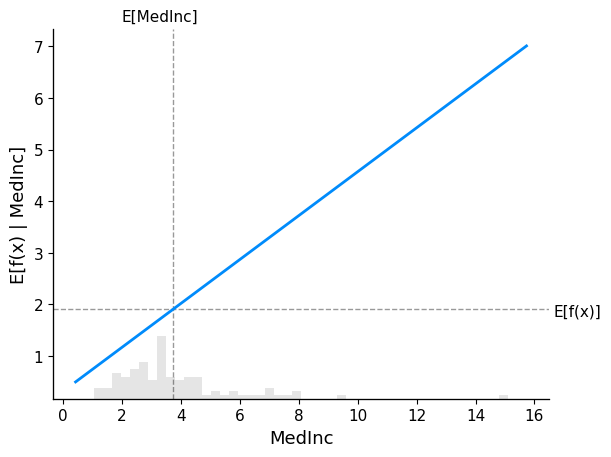

In [ ]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [ ]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

customer = pd.read_csv("data/customer_churn.csv")
customer.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/customer_churn.csv'